In [211]:
import numpy as np
import matplotlib.pyplot as plt
from analysis2 import *
from scipy.optimize import curve_fit
dir = "C:/Users/photonicintegration/Documents/Waveforms"

In [212]:
t_old, y_old = load_data("data/0_.npy", 2, 1, 5)
y_old_max = np.max(y_old)
y_old_min = np.min(y_old)
y_old = (y_old - y_old_min) / (y_old_max - y_old_min)

In [213]:
with open(f"{dir}/20251007_oyapzt.csv", 'r') as f:
    oyapzt = np.loadtxt(f, delimiter=',', skiprows=3)
t_new = oyapzt[:,0] - oyapzt[0,0]
y_new = oyapzt[:,2]
y_new_max = np.max(y_new)
y_new_min = np.min(y_new)
y_new = (y_new - y_new_min) / (y_new_max - y_new_min)

In [214]:
t_oya, y_oya = load_data("data/oyapiezo_again_.npy", 3, 1, 5)
y_oya_max = np.max(y_oya)
y_oya_min = np.min(y_oya)
y_oya = (y_oya - y_oya_min) / (y_oya_max - y_oya_min)

In [215]:
t_today, y_today = load_data("data/today_locked_.npy", 3, 1, 5)
y_today_max = np.max(y_today)
y_today_min = np.min(y_today)
y_today = (y_today - y_today_min) / (y_today_max - y_today_min)

In [216]:
t_today_unlock, y_today_unlock = load_data("data/today_unlocked_.npy", 3, 1, 5)
y_today_unlock_max = np.max(y_today_unlock)
y_today_unlock_min = np.min(y_today_unlock)
y_today_unlock = (y_today_unlock - y_today_unlock_min) / (y_today_unlock_max - y_today_unlock_min)

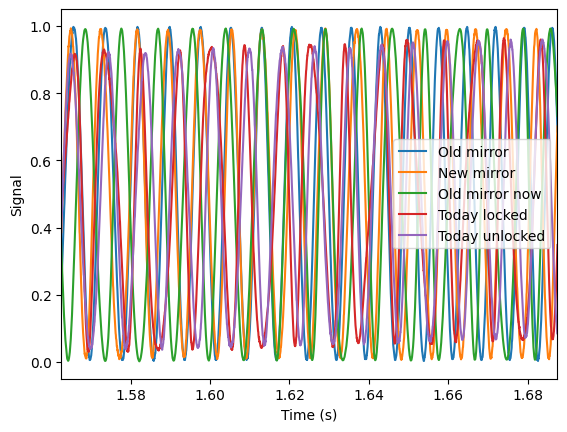

In [219]:
plt.plot(t_old, y_old, label='Old mirror')
plt.plot(t_new, y_new, label='New mirror')
plt.plot(t_oya, y_oya, label='Old mirror now')
plt.plot(t_today, y_today, label='Today locked')
plt.plot(t_today_unlock, y_today_unlock, label='Today unlocked')
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.xlim(1.5 + 1/16, 1.5 + 3/16)
plt.legend()
plt.show()

In [232]:
t_seg_old = []
y_seg_old = []
std_old_list = []
t_seg_new = []
y_seg_new = []
std_new_list = []
t_seg_oya = []
y_seg_oya = []
std_oya_list = []
t_seg_today = []
y_seg_today = []
std_today_list = []
t_seg_today_unlock = []
y_seg_today_unlock = []
std_today_unlock_list = []

n_values = np.arange(0, 10)

for n in n_values:
    t_start = 0.5 * n + 1/16
    t_end = t_start +  2/16

    # old
    mask = (t_old >= t_start) & (t_old <= t_end)
    t_seg = t_old[mask]
    y_seg = y_old[mask] - 0.5
    t_seg_old.append(t_seg)
    y_seg_old.append(y_seg)
    zero_crossings = np.where(np.diff(np.sign(y_seg)))[0]
    zero_crossings_time = t_seg[zero_crossings] * 1000 # ms
    increment_old = np.diff(zero_crossings_time)
    std_old = np.std(increment_old)
    std_old_list.append(std_old)

    # new
    mask = (t_new >= t_start) & (t_new <= t_end)
    t_seg = t_new[mask]
    y_seg = y_new[mask] - 0.5
    t_seg_new.append(t_seg)
    y_seg_new.append(y_seg)
    zero_crossings = np.where(np.diff(np.sign(y_seg)))[0]
    zero_crossings_time = t_seg[zero_crossings] * 1000 # ms
    increment_new = np.diff(zero_crossings_time)
    std_new = np.std(increment_new)
    std_new_list.append(std_new)

    # oya
    mask = (t_oya >= t_start) & (t_oya <= t_end)
    t_seg = t_oya[mask]
    y_seg = y_oya[mask] - 0.5
    t_seg_oya.append(t_seg)
    y_seg_oya.append(y_seg)
    zero_crossings = np.where(np.diff(np.sign(y_seg)))[0]
    zero_crossings_time = t_seg[zero_crossings] * 1000 # ms
    increment_oya = np.diff(zero_crossings_time)
    std_oya = np.std(increment_oya)
    std_oya_list.append(std_oya)

    # today
    mask = (t_today >= t_start) & (t_today <= t_end)
    t_seg = t_today[mask]
    y_seg = y_today[mask] - 0.5
    t_seg_today.append(t_seg)
    y_seg_today.append(y_seg)
    zero_crossings = np.where(np.diff(np.sign(y_seg)))[0]
    zero_crossings_time = t_seg[zero_crossings] * 1000 # ms
    increment_today = np.diff(zero_crossings_time)
    std_today = np.std(increment_today)
    std_today_list.append(std_today)

    # today unlock
    mask = (t_today_unlock >= t_start) & (t_today_unlock <= t_end)
    t_seg = t_today_unlock[mask]
    y_seg = y_today_unlock[mask] - 0.5
    t_seg_today_unlock.append(t_seg)
    y_seg_today_unlock.append(y_seg)
    zero_crossings = np.where(np.diff(np.sign(y_seg)))[0]
    zero_crossings_time = t_seg[zero_crossings] * 1000 # ms
    increment_today_unlock = np.diff(zero_crossings_time)
    std_today_unlock = np.std(increment_today_unlock)
    std_today_unlock_list.append(std_today_unlock)

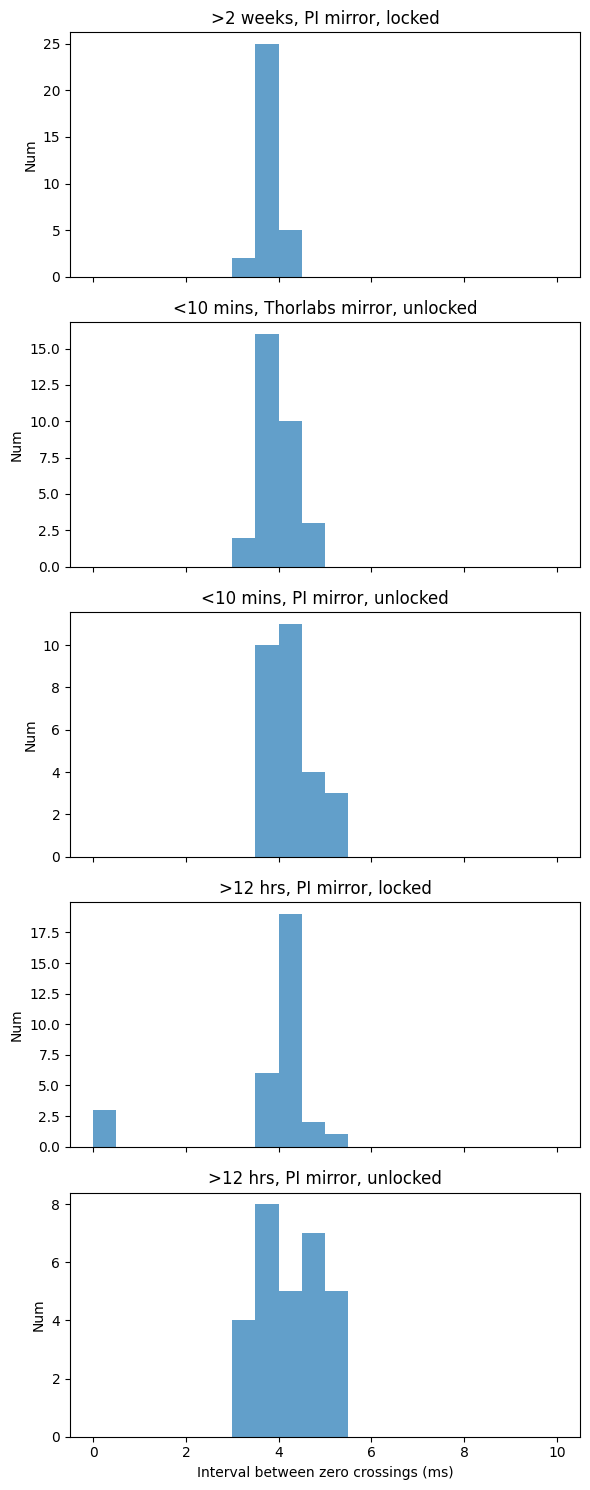

In [233]:
fig, axes = plt.subplots(5, 1, figsize=(6, 15), sharex=True)

datasets = [
    (increment_old, '>2 weeks, PI mirror, locked'),
    (increment_new, '<10 mins, Thorlabs mirror, unlocked'),
    (increment_oya, '<10 mins, PI mirror, unlocked'),
    (increment_today, '>12 hrs, PI mirror, locked'),
    (increment_today_unlock, '>12 hrs, PI mirror, unlocked')
]

for ax, (data, label) in zip(axes, datasets):
    ax.hist(data, alpha=0.7, bins=20, range=(0, 10))
    ax.set_title(label)
    ax.set_ylabel('Num')

axes[-1].set_xlabel('Interval between zero crossings (ms)')

plt.tight_layout()
plt.show()

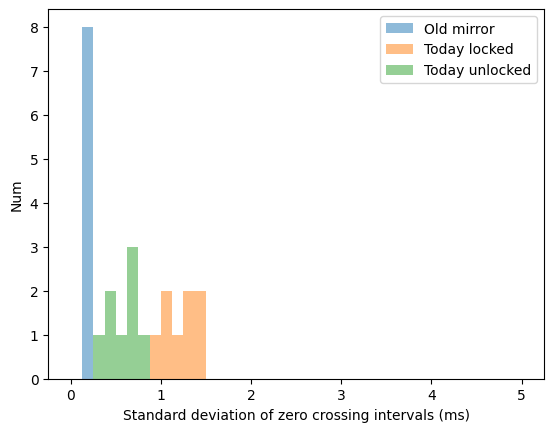

In [236]:
plt.hist(std_old_list, alpha=0.5, bins=40, range=(0, 5), label='Old mirror')
#plt.hist(std_new_list, alpha=0.5, bins=40, range=(0, 1), label='New mirror')
#plt.hist(std_oya_list, alpha=0.5, bins=40, range=(0, 1), label='Old mirror now')
plt.hist(std_today_list, alpha=0.5, bins=40, range=(0, 5), label='Today locked')
plt.hist(std_today_unlock_list, alpha=0.5, bins=40, range=(0, 5), label='Today unlocked')
plt.xlabel('Standard deviation of zero crossing intervals (ms)')
plt.ylabel('Num')
plt.legend()
plt.show()

datasets = [
    (increment_old, '>2 weeks, PI mirror, locked'),
    (increment_new, '<10 mins, Thorlabs mirror, unlocked'),
    (increment_oya, '<10 mins, PI mirror, unlocked'),
    (increment_today, '>12 hrs, PI mirror, locked'),
    (increment_today_unlock, '>12 hrs, PI mirror, unlocked')
]

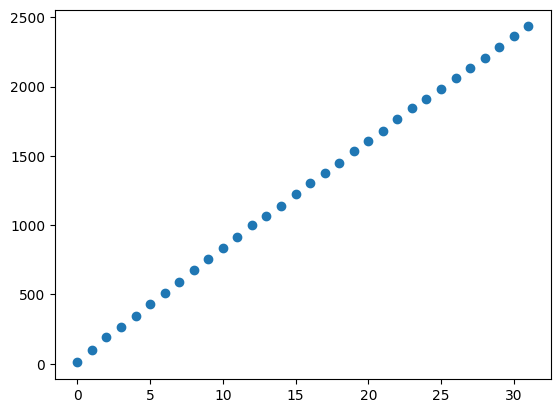

In [117]:
#n = len(zero_crossings)
plt.plot(zero_crossings, 'o')

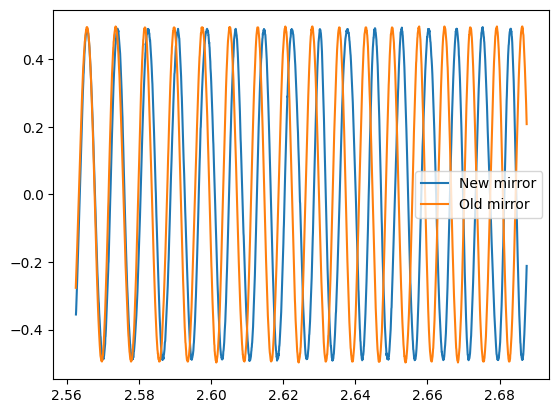

In [111]:
seg_idx = 5
plt.plot(t_seg_new[seg_idx], y_seg_new[seg_idx], label='New mirror')
plt.plot(t_seg_old[seg_idx], y_seg_old[seg_idx], label='Old mirror')
plt.legend()
plt.show()

# for fitting

In [100]:
def sine_func(x, A, f, phi, D):
    return A * np.sin(2 * np.pi * f * x + phi) + D

T = 0.25/33
f = 1 / T
param0 = [0.5, f, 0.1, 0.5]

Segment 2: A=-0.411, f=132.852, phi=-6.445, D=0.507


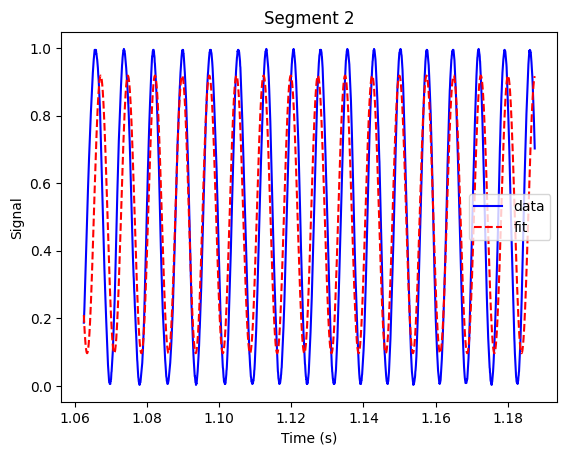

Segment 3: A=-0.411, f=132.839, phi=-8.963, D=0.508


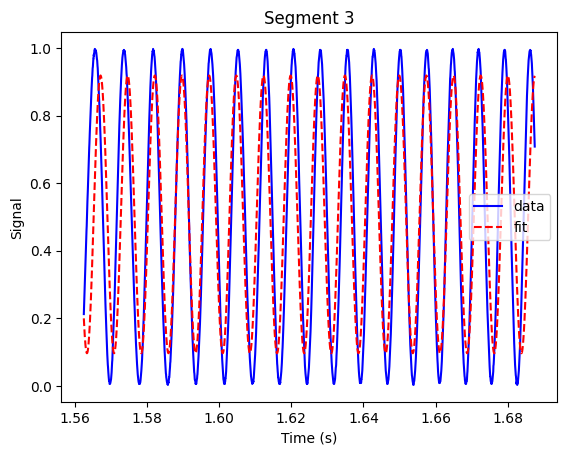

Segment 4: A=-0.412, f=132.774, phi=-10.702, D=0.508


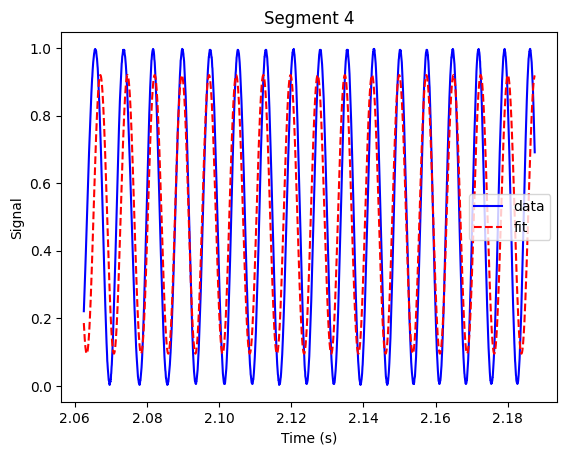

Segment 5: A=-0.412, f=132.731, phi=-12.424, D=0.507


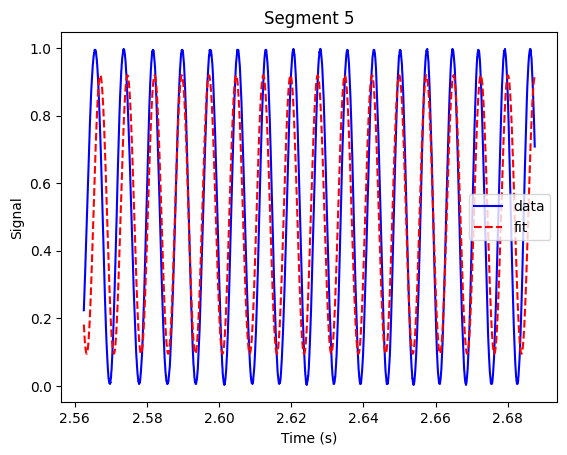

Segment 6: A=-0.412, f=132.733, phi=-14.810, D=0.507


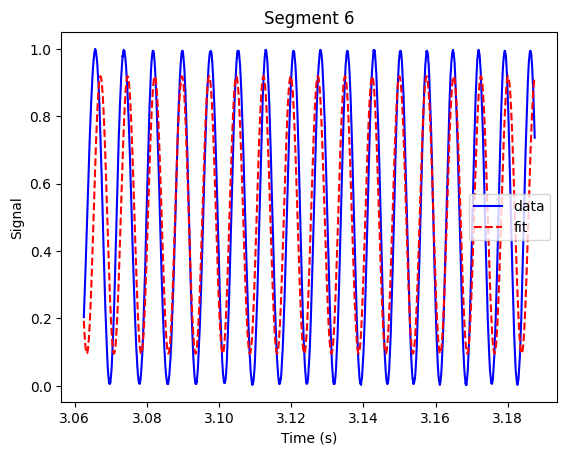

Segment 7: A=-0.412, f=132.753, phi=-17.588, D=0.507


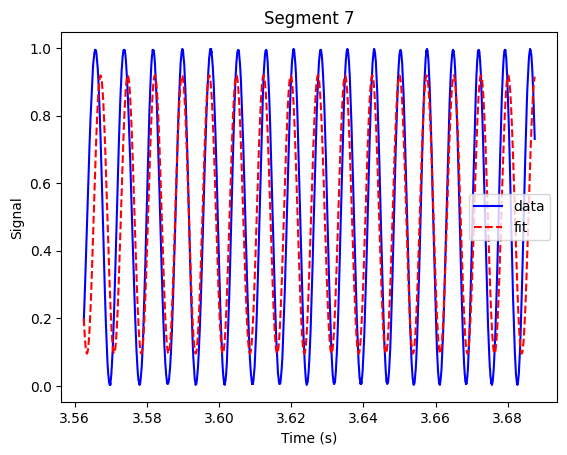

Segment 8: A=-0.412, f=132.743, phi=-19.662, D=0.507


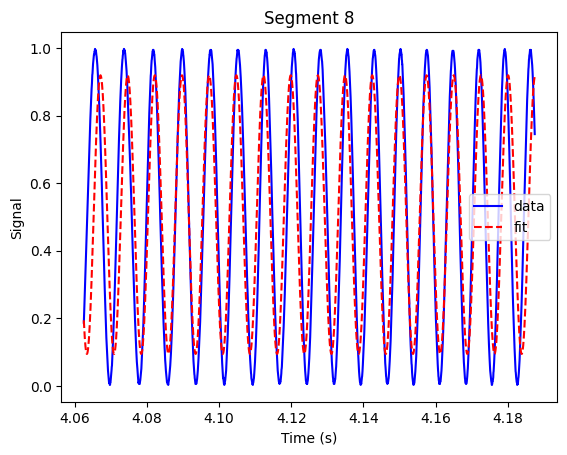

Segment 9: A=-0.413, f=132.721, phi=-21.358, D=0.507


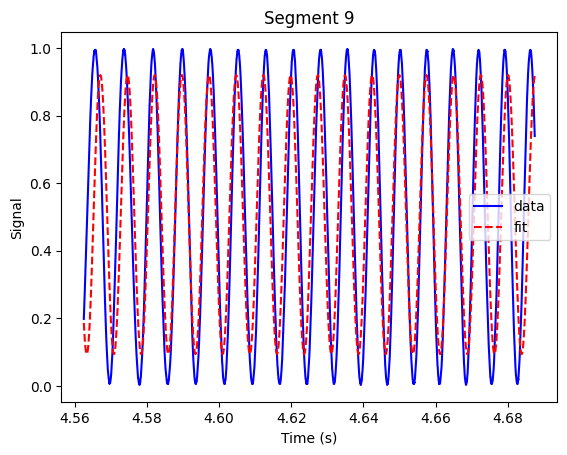

In [103]:
seg_idces = np.arange(2, 10)
for seg_idx in seg_idces:
    t_seg = t_seg_old[seg_idx]
    y_seg = y_seg_old[seg_idx]

    popt, pcov = curve_fit(sine_func, t_seg, y_seg, p0=param0)
    print(f"Segment {seg_idx}: A={popt[0]:.3f}, f={popt[1]:.3f}, phi={popt[2]:.3f}, D={popt[3]:.3f}")

    plt.plot(t_seg, y_seg, 'b-', label='data')
    plt.plot(t_seg, sine_func(t_seg, *popt), 'r--', label='fit')
    plt.xlabel('Time (s)')
    plt.ylabel('Signal')
    plt.title(f'Segment {seg_idx}')
    plt.legend()
    plt.show()